In [ ]:
import pandas as pd
# read the csv file
df = pd.read_csv('/content/Health_insurance (1).csv')

#display the first five rows
df.head()



,pid,age,sex,bmi,children,smoker,region,diabetes,heart rate,Creatinine,glucose,charges
0,1,19,female,27.900,0,yes,southwest,1,68.837838,1.958333,114.636364,16884.92400
1,2,18,male,33.770,1,no,southeast,0,101.370370,1.122222,147.500000,NaN
2,3,28,male,33.000,3,no,southeast,0,72.318182,1.871429,149.000000,4449.46200
3,4,33,male,22.705,0,no,northwest,0,94.500000,0.585714,128.250000,21984.47061
4,5,32,NaN,28.880,0,no,northwest,0,67.920000,1.950000,145.750000,3866.85520


In [ ]:
df.isnull().sum()

,0
pid,0
age,0
sex,2
bmi,3
children,0
smoker,0
region,0
diabetes,0
heart rate,13
Creatinine,0


In [ ]:


df = df.drop_duplicates(subset=['pid'])

remove outliers

In [ ]:
import numpy as np
# Assuming 'df' is your dataframe and contains numeric columns you want to process.
def remove_outliers_iqr(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [ ]:
for col in numeric_columns:
  df = remove_outliers_iqr(df,col)

In [ ]:
# check missing values in all columns
df.isnull().sum()

,0
pid,0
age,0
sex,1
bmi,0
children,0
smoker,0
region,0
diabetes,0
heart rate,0
Creatinine,0


In [ ]:
numeric_columns

Index(['pid', 'age', 'bmi', 'children', 'diabetes', 'heart rate', 'Creatinine',
       'glucose', 'charges'],
      dtype='object')

In [ ]:
# create a list of columns to fill NA values
columns_to_fill = ['bmi','heart rate','glucose'] #example columns,replace with your actual columns

#fill NA values in specifies columns with the meann of each column
for col in columns_to_fill:
  df[col].fillna(df[col].mean(),inplace=True)

/tmp/ipython-input-2809089263.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [ ]:
category_cols = df.select_dtypes(include=['object']).columns

for col in category_cols:
  print(df[col].unique())

['female' 'male' nan]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
# replace 'Female' with female in sex column

# dict1 ={'Female':'female','mal':'male'}
#df['sex'] = df['sex'].replace(dict1)
#calculate the mode of the column
mode_value = df['sex'].mode([0])
#replace NaN values with the mode
df['sex'].fillna(mode_value[0],inplace=True)

/tmp/ipython-input-3931135695.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(mode_value[0],inplace=True)


In [ ]:
# one-hot encode the sex,smoker,region column data
df = pd.get_dummies(df,columns=['sex','smoker','region'])

In [ ]:
# Display the first 5 rows
df.head()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,19,27.900,0,1,68.837838,1.958333,114.636364,16884.92400,True,False,False,True,False,False,False,True
2,3,28,33.000,3,0,72.318182,1.871429,149.000000,4449.46200,False,True,True,False,False,False,True,False
3,4,33,22.705,0,0,94.500000,0.585714,128.250000,21984.47061,False,True,True,False,False,True,False,False
4,5,32,28.880,0,0,67.920000,1.950000,145.750000,3866.85520,False,True,True,False,False,True,False,False
5,6,31,25.740,0,0,74.181818,1.612500,98.333333,3756.62160,True,False,True,False,False,False,True,False


In [ ]:
# Normalize numerical columns

# store min-max values for later use
min_max_values = {}

cols = ['age','bmi','heart rate','Creatinine','glucose']
for i in cols:
  min_val = df[i].min()
  max_val = df[i].max()
  df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())
  min_max_values[i] = (min_val,max_val)

In [ ]:
min_max_values

{'age': (18, 64),
 'bmi': (15.96, 47.52),
 'heart rate': (39.32142857, 129.125),
 'Creatinine': (0.266666667, 3.311111111),
 'glucose': (69.1, 252.0)}

In [ ]:
# save to JSON file
import json
with open('min_max_values.json','w') as json_file:
  json.dump(min_max_values,json_file)

In [ ]:
# Display the first 5 rows
df.head()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0.021739,0.378327,0,1,0.328677,0.555657,0.248969,16884.92400,True,False,False,True,False,False,False,True
2,3,0.217391,0.539924,3,0,0.367433,0.527112,0.436851,4449.46200,False,True,True,False,False,False,True,False
3,4,0.326087,0.213720,0,0,0.614436,0.104797,0.323401,21984.47061,False,True,True,False,False,True,False,False
4,5,0.304348,0.409379,0,0,0.318457,0.552920,0.419081,3866.85520,False,True,True,False,False,True,False,False
5,6,0.282609,0.309886,0,0,0.388185,0.442062,0.159832,3756.62160,True,False,True,False,False,False,True,False


In [ ]:
df.corr()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
pid,1.000000,0.020475,-0.003511,0.014026,0.047045,0.064814,0.040316,0.052704,0.023309,-0.036572,0.036572,0.005622,-0.005622,0.014203,0.016058,-0.042186,0.012234
age,0.020475,1.000000,0.129860,0.028331,0.098091,-0.028978,0.027501,0.056262,0.405246,0.048346,-0.048346,0.082533,-0.082533,-0.002207,0.002779,-0.016891,0.016366
bmi,-0.003511,0.129860,1.000000,-0.002198,-0.035384,-0.053729,0.062161,-0.010598,-0.065636,-0.025650,0.025650,0.263388,-0.263388,-0.116904,-0.122601,0.240479,-0.003067
children,0.014026,0.028331,-0.002198,1.000000,-0.021114,-0.046365,0.029730,0.007067,0.055658,0.011317,-0.011317,-0.005000,0.005000,-0.016229,0.014552,-0.013171,0.014714
diabetes,0.047045,0.098091,-0.035384,-0.021114,1.000000,-0.142411,0.142499,0.319982,0.023603,0.004387,-0.004387,0.008049,-0.008049,0.026009,0.009529,-0.010164,-0.025072
heart rate,0.064814,-0.028978,-0.053729,-0.046365,-0.142411,1.000000,-0.195500,-0.024848,-0.003080,0.015473,-0.015473,-0.035912,0.035912,0.039870,-0.077237,0.068231,-0.030631
Creatinine,0.040316,0.027501,0.062161,0.029730,0.142499,-0.195500,1.000000,0.043254,0.054792,-0.010179,0.010179,0.021797,-0.021797,-0.037394,-0.018781,0.061877,-0.006335
glucose,0.052704,0.056262,-0.010598,0.007067,0.319982,-0.024848,0.043254,1.000000,-0.007643,-0.073815,0.073815,0.058342,-0.058342,0.019260,-0.004513,-0.004741,-0.009778
charges,0.023309,0.405246,-0.065636,0.055658,0.023603,-0.003080,0.054792,-0.007643,1.000000,0.023153,-0.023153,-0.598446,0.598446,0.074291,0.023936,-0.033311,-0.064027
sex_female,-0.036572,0.048346,-0.025650,0.011317,0.004387,0.015473,-0.010179,-0.073815,0.023153,1.000000,-1.000000,0.021720,-0.021720,-0.017477,0.008297,0.008301,0.000648


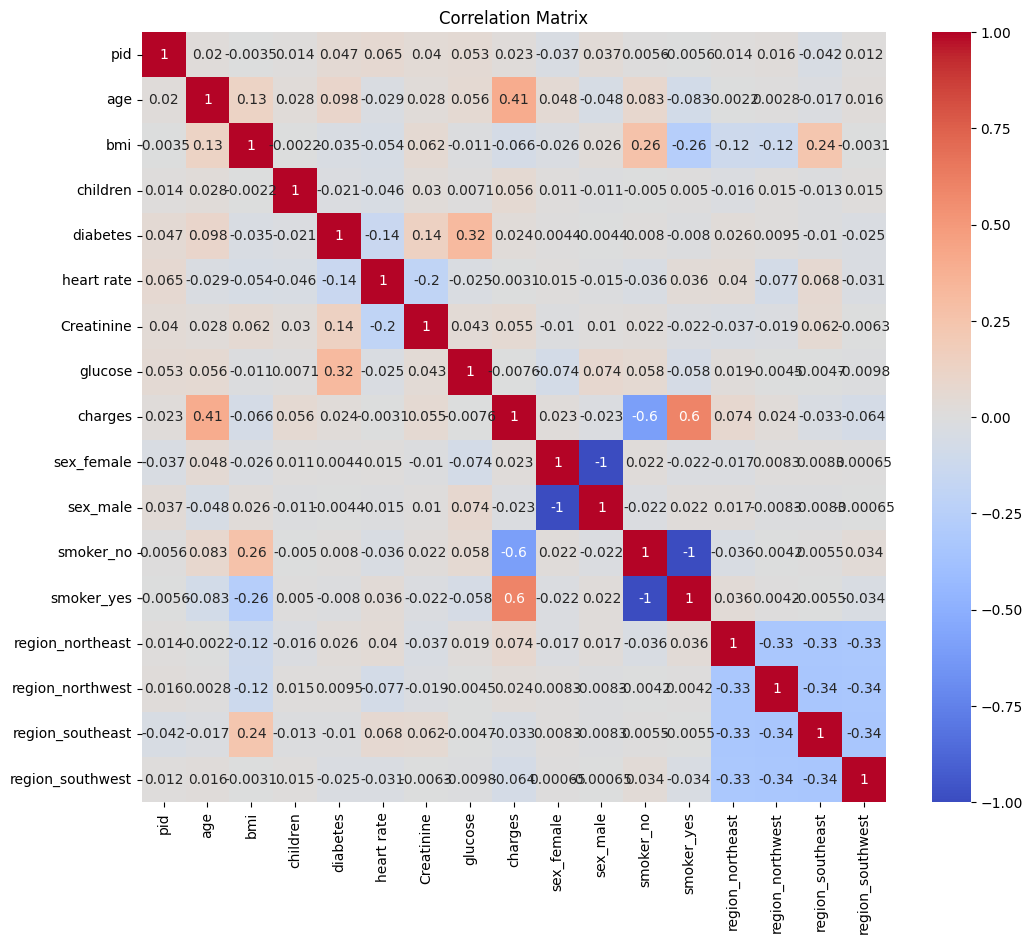

In [ ]:
# prompt:seaborn correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your data frame
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Separate the features and target variable
X = df.drop(columns=['charges','pid','sex_male','smoker_yes'],axis=1)
y = df['charges']

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Linear Regression

In [ ]:
# Linear Regression model to predict th outcome

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
# predict the target variable for the test set
y_pred = reg.predict(X_test)

In [ ]:
# compute the rmse,r2 score
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print('rmse:',rmse)
print('r2 :',r2)

rmse: 4433.818417391719
r2 : 0.6345736070742469


In [ ]:
pd.DataFrame(X.columns,reg.coef_)

,0
11250.435984,age
2324.283207,bmi
300.387557,children
-180.541745,diabetes
-599.683869,heart rate
2032.020496,Creatinine
235.186905,glucose
434.492422,sex_female
-15062.306667,smoker_no
527.447348,region_northeast


In [ ]:
x_test_sample = X_test.iloc[0,:]
x_test_sample_reshaped = np.array(x_test_sample).reshape(1,-1)

In [ ]:
y_pred_sample = reg.predict(x_test_sample_reshaped)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_sample

array([11519.21371376])

In [ ]:
import joblib
joblib.dump(reg,'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [ ]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.4 MB/s eta 0:00:00


In [ ]:
streamlit_code = """
import streamlit as st
import joblib
import numpy as np
import json
import pandas as pd

# Load the trained model
  model = joblib.load('linear_regression_model.pkl')

# Load the min_max_values scaling values
with open('min_max_values.json', 'r') as json_file:
        min_max_values = json.load(json_file)


# Function to scale numerical inputs
def scale_numerical_input(value,col_name):
    min_val, max_val = min_max_values[col_name]
    rerun_value = (value - min_val) / (max_val - min_val)

# Streamlit app title
st.title("Insurance charges Prediction")
st.write("Enter the input values for prediction:")

# Input fields for user data


age = st.slider("Age", min_value=18.0, max_value=64.0,step = 1.0 value=30)
bmi = st.number_input("BMI", min_value=15.0, max_value=50.0,step = 0.1 value=25.0)
children = st.slider("Number of Children", min_value=0, max_value=10,step=1,value=0)
diabetes = st.selectbox("Has Diabetes?" options=["No", "Yes"])
heart_rate = st.number_input("Heart Rate", min_value=50.0, max_value=120.0,step=1.0 value=75.0)
creatinine = st.number_input("Creatinine", min_value=0.0, max_value=2.0, value=1.0)
glucose = st.number_input("Glucose", min_value=50.0,max_value=300.0,step = 1.0, value=100.0)

#categorical features
sex_female = st.selectbox("Sex", options=['female', 'male'])
smoker_no = st.selectionbox("Smoker?", options=['no', 'yes']) =="No"

#Region selection
region = st.selectbox("Region", options=['southwest', 'southeast', 'northwest', 'northeast'])
region_northeast =  region == 'northeast"
region_northwest =  region == 'northwest"
region_southeast =  region == 'southeast"
region_southwest =  region == 'southwest"

# Normalized function
def min_max_scale(value, min_max_values):
    return (value - min_val) / (max_val - min_val)

# Load the min_max_values from JSON
with open('min_max_values.json', 'r') as json_file:
    min_max_values = json.load(json_file)

# Normalized inputs
age_norm = min_max_scale(age,"min_max_values['age'])
bmi_norm = min_max_scale(bmi,"min_max_values['bmi'])
heart_rate_norm = min_max_scale(heart_rate,"min_max_values['heart rate'])
creatinine_norm = min_max_scale(creatinine,"min_max_values['Creatinine'])
glucose_norm = min_max_scale(glucose,"min_max_values['glucose'])


# Preprare input data for prediction
input_data = np.array([
  age_norm, bmi_norm, children, int(diabetes=="Yes"), heart_rate_norm, creatinine_norm, glucose_norm,
  sex_female, int(smoker_no), int(region_northeast),int(region_northwest),
   int(region_southeast),int(region_southwest])
   }),reshape(1,-1)

#predict button
if st.button("Predict"):
  prediction = model.predict(input_data)
    st.success(f"Predicted Health Insurance Premium: ${prediction[0]:.2f}")
"""

In [ ]:
with open('app.py', 'w') as f:
    f.write(streamlit_code)

In [ ]:
!streamlit run app.py &> /content/log.txt &

from pyngrok import ngrok
ngrok.set_auth_token("31u5ZN7dbMBCzIkhEsmacq4YpXm_4rFeCp4h6xF2hBY9LLep5")

from pyngrok import ngrok

# Expose the streamlit server running on port 8501
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://7cfe64b8d501.ngrok-free.app" -> "http://localhost:8501"
